# **GNNs Using Python: Chapter 03 - Node Embeddings: Word2Vec & DeepWalk**

*Author: Rafael Rodríguez Palomo*

*January, 2024*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m spacy download en_core_web_md

In [20]:
from gensim.models.word2vec import Word2Vec
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

## **Word2Vec Model**

Classic Word2Vec architecture, I only include an example because it is a well known architecture for me. Word2Vec is the basic component of DeepWalk architecture.

In [35]:
# Preprocessing is done with spaCy for some sentences
sentences = ['The rover and the helicopter began their missions at the Octavia E. Butler Landing site near the western rim of the 45 km',
             'The helicopter was intended to perform a 30-sol technology demonstration',
             'The development of the project that would eventually become Ingenuity started in 2012 when JPL director Charles Elachi toured and met with members of the Autonomous Systems Division at JPL',
             'At the time of the approval of the Mars 2020 program in July 2014, a helicopter flight demonstration was neither scoped nor budgeted',
             'The Ingenuity team was comparatively small, with never more than 65 full-time-equivalent employees from JPL. Program workers from AeroVironment, NASA AMES and Langley research centers brought the total to 150']

nlp = spacy.load('en_core_web_md')
lemmas = [[token.lemma_ for token in nlp(doc.lower()) if not token.is_punct and not token.is_stop and (token.is_alpha or token.is_digit)]
          for doc in sentences]

print(lemmas)

[['rover', 'helicopter', 'begin', 'mission', 'octavia', 'butler', 'landing', 'site', 'near', 'western', 'rim', '45', 'km'], ['helicopter', 'intend', 'perform', '30', 'sol', 'technology', 'demonstration'], ['development', 'project', 'eventually', 'ingenuity', 'start', '2012', 'jpl', 'director', 'charles', 'elachi', 'tour', 'meet', 'member', 'autonomous', 'system', 'division', 'jpl'], ['time', 'approval', 'mars', '2020', 'program', 'july', '2014', 'helicopter', 'flight', 'demonstration', 'scope', 'budget'], ['ingenuity', 'team', 'comparatively', 'small', '65', 'time', 'equivalent', 'employee', 'jpl', 'program', 'worker', 'aerovironment', 'nasa', 'ame', 'langley', 'research', 'center', 'bring', 'total', '150']]


In [36]:
model = Word2Vec(lemmas, vector_size=100, sg=1, window=5, min_count=0, epochs=40)
embeddings = model.wv.vectors
print(model.wv.vectors.shape)
print(f"Word embedding of word {lemmas[0][0]}: {model.wv[lemmas[0][0]]}")
words = list(model.wv.key_to_index.keys())

(61, 100)
Word embedding of word rover: [ 0.00231653 -0.0075744   0.00541778  0.00773545 -0.00251627 -0.00462736
 -0.00894744  0.00553539  0.002822    0.00821881  0.00363195 -0.00334576
  0.00360197  0.00892785  0.00989055  0.00696967 -0.00832535 -0.00794262
  0.00700246 -0.00774402  0.00350051  0.0081268  -0.00251227  0.00620809
 -0.00794474  0.00612001  0.00509232  0.00317285 -0.00869649  0.00885574
  0.00896815 -0.00203673  0.00501243  0.00537371 -0.00197505  0.00585409
 -0.00421754 -0.0010535  -0.00141233 -0.00453632 -0.00100611 -0.00770871
  0.00404629  0.00885858  0.00492589  0.00567626 -0.00509768  0.00472304
 -0.00642009 -0.00454637  0.01021419  0.00609452 -0.00528041 -0.00646431
  0.0076355   0.00277899  0.00719585 -0.00640262 -0.00134812 -0.00091978
 -0.00021813  0.00168766 -0.00618805  0.00468102 -0.00355766  0.00905207
 -0.0018524   0.0096881  -0.00219044  0.00605526 -0.00787857 -0.00840482
  0.00074376 -0.00254016  0.0110862   0.00387497 -0.00567216  0.00756246
  0.0002696

To visualize the embedding we run a T-SNE over the word embeddings, note that the training set is quite scarce so we do not expect very good results.

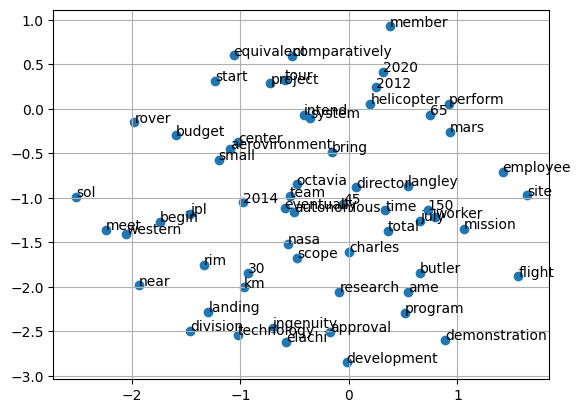

In [37]:
tsne = TSNE(n_components=2)
embed_2d = tsne.fit_transform(embeddings)

x = embed_2d[:,0]
y = embed_2d[:,1]

plt.scatter(x, y)
for i, txt in enumerate(words):
    plt.text(x[i], y[i], txt, fontsize=10)

plt.grid()
plt.show()

## **DeepWalk and Random Walks**